In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [9]:
# Reflect the tables into classes using automap_base
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to the classes
Station = Base.classes.station
Measurement = Base.classes.measurement
print(Measurement)
# Create a session to link Python to the database
session = Session(engine)

<class 'sqlalchemy.ext.automap.measurement'>


## Precipitation Analysis

In [33]:
# Retrieve the last 12 months of precipitation data
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
# latest_date =dt.date(latest_date)
latest_date
# latest_date = pd.to_datetime(latest_date)
# latest_date = pd.to_datetime(latest_date)

'2017-08-23'

In [34]:
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [35]:

one_year_ago

datetime.date(2016, 8, 23)

In [39]:
precipitation_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= one_year_ago)\
    .order_by(Measurement.date).all()

precipitation_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

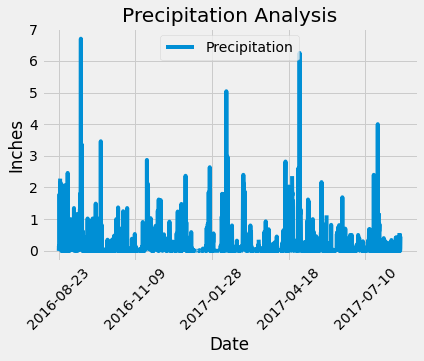

In [40]:
# Convert the query results to a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)

# Plot the precipitation data
precipitation_df.plot(title='Precipitation Analysis', ylabel='Inches', rot=45)
plt.show()

## Station Analysis

In [41]:
# Query to calculate the total number of stations
total_stations = session.query(func.count(Station.station)).scalar()
print(f'Total number of stations: {total_stations}')

# Query to find the most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()

most_active_station = active_stations[0][0]
print(f'Most active station: {most_active_station}')

Total number of stations: 9
Most active station: USC00519281


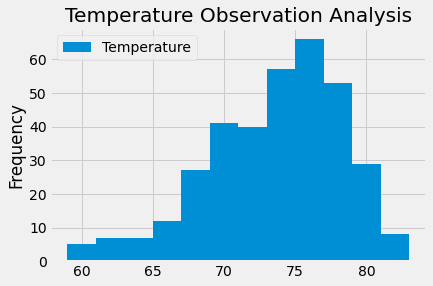

In [42]:
# Retrieve the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == most_active_station, Measurement.date >= one_year_ago)\
    .order_by(Measurement.date).all()

# Convert the query results to a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])
temperature_df.set_index('Date', inplace=True)

# Plot the temperature observation data
temperature_df.plot(kind='hist', bins=12, title='Temperature Observation Analysis', ylabel='Frequency')
plt.show()

# Close the session
session.close()

In [43]:
# Design a query to calculate the total number of stations
total_stations_query = session.query(func.count(Station.station)).scalar()
print(f'Total number of stations: {total_stations_query}')

# Design a query to find the most-active stations
most_active_stations_query = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()

# Print the most-active stations and their observation counts
print("Most-active stations and their observation counts:")
for station, observation_count in most_active_stations_query:
    print(f"Station {station}: {observation_count} observations")


Total number of stations: 9
Most-active stations and their observation counts:
Station USC00519281: 2772 observations
Station USC00519397: 2724 observations
Station USC00513117: 2709 observations
Station USC00519523: 2669 observations
Station USC00516128: 2612 observations
Station USC00514830: 2202 observations
Station USC00511918: 1979 observations
Station USC00517948: 1372 observations
Station USC00518838: 511 observations


In [44]:
# Design a query to calculate the total number of stations
total_stations_query = session.query(func.count(Station.station)).scalar()
print(f'Total number of stations: {total_stations_query}')

# Design a query to find the most-active stations
most_active_stations_query = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()

# Print the most-active stations and their observation counts
print("Most-active stations and their observation counts:")
for station, observation_count in most_active_stations_query:
    print(f"Station {station}: {observation_count} observations")

# Find the station with the greatest number of observations
most_active_station_id = most_active_stations_query[0][0]
print(f"\nStation with the greatest number of observations: {most_active_station_id}")

# Design a query to calculate the lowest, highest, and average temperatures for the most-active station
temperature_stats_query = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == most_active_station_id).all()

# Extract the results
lowest_temperature, highest_temperature, average_temperature = temperature_stats_query[0]

# Print the temperature statistics
print(f"\nTemperature Statistics for Station {most_active_station_id}:")
print(f"Lowest Temperature: {lowest_temperature} °F")
print(f"Highest Temperature: {highest_temperature} °F")
print(f"Average Temperature: {round(average_temperature, 2)} °F")


Total number of stations: 9
Most-active stations and their observation counts:
Station USC00519281: 2772 observations
Station USC00519397: 2724 observations
Station USC00513117: 2709 observations
Station USC00519523: 2669 observations
Station USC00516128: 2612 observations
Station USC00514830: 2202 observations
Station USC00511918: 1979 observations
Station USC00517948: 1372 observations
Station USC00518838: 511 observations

Station with the greatest number of observations: USC00519281

Temperature Statistics for Station USC00519281:
Lowest Temperature: 54.0 °F
Highest Temperature: 85.0 °F
Average Temperature: 71.66 °F


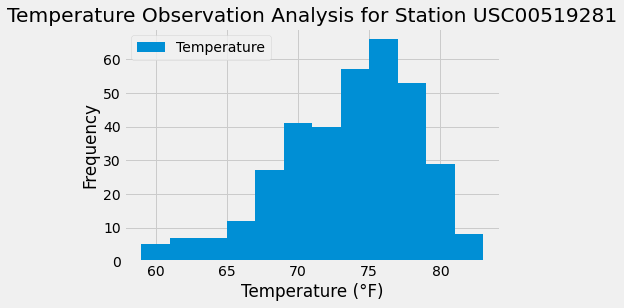

In [45]:
import matplotlib.pyplot as plt

# Design a query to get the previous 12 months of TOBS data for the most-active station
tobs_data_query = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == most_active_station_id, Measurement.date >= one_year_ago)\
    .order_by(Measurement.date).all()

# Convert the query results to a Pandas DataFrame
tobs_df = pd.DataFrame(tobs_data_query, columns=['Date', 'Temperature'])
tobs_df.set_index('Date', inplace=True)

# Plot the results as a histogram with bins=12
tobs_df.plot(kind='hist', bins=12, title=f'Temperature Observation Analysis for Station {most_active_station_id}', ylabel='Frequency')
plt.xlabel('Temperature (°F)')
plt.show()

# Close the session
session.close()

In [1]:
from flask import Flask, jsonify
import datetime as dt

app = Flask(__name__)

# Create the SQLAlchemy engine, reflect the tables, and create a session (similar to the previous code)
# ...

# Define the routes
@app.route("/")
def home():
    """List all available routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/&lt;start&gt;<br/>"
        f"/api/v1.0/&lt;start&gt;/&lt;end&gt;"
    )

@app.route("/api/v1.0/precipitation")
def precipitation():
    """Convert the query results to a dictionary and return as JSON."""
    # Perform the precipitation analysis (similar to the previous code)
    # ...

    # Convert the results to a dictionary
    precipitation_dict = dict(zip(precipitation_df.index, precipitation_df['Precipitation']))

    return jsonify(precipitation_dict)

@app.route("/api/v1.0/stations")
def stations():
    """Return a JSON list of stations."""
    # Query for the list of stations
    stations_query = session.query(Station.station).all()
    stations_list = [station[0] for station in stations_query]

    return jsonify(stations_list)

@app.route("/api/v1.0/tobs")
def tobs():
    """Query temperature observations for the most-active station and return as JSON."""
    # Perform the temperature observation analysis (similar to the previous code)
    # ...

    # Convert the results to a list of dictionaries
    tobs_list = [{"Date": date, "Temperature": temperature} for date, temperature in tobs_data_query]

    return jsonify(tobs_list)

@app.route("/api/v1.0/<start>")
def temperature_start(start):
    """Calculate TMIN, TAVG, and TMAX for dates greater than or equal to the start date and return as JSON."""
    # Convert the start date string to a datetime object
    start_date = dt.datetime.strptime(start, "%Y-%m-%d")

    # Query for temperature statistics
    temperature_stats_query = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))\
        .filter(Measurement.date >= start_date).all()

    # Extract the results
    tmin, tavg, tmax = temperature_stats_query[0]

    # Return the results as JSON
    return jsonify({"TMIN": tmin, "TAVG": tavg, "TMAX": tmax})

@app.route("/api/v1.0/<start>/<end>")
def temperature_start_end(start, end):
    """Calculate TMIN, TAVG, and TMAX for a date range and return as JSON."""
    # Convert the start and end date strings to datetime objects
    start_date = dt.datetime.strptime(start, "%Y-%m-%d")
    end_date = dt.datetime.strptime(end, "%Y-%m-%d")

    # Query for temperature statistics within the date range
    temperature_stats_query = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))\
        .filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

    # Extract the results
    tmin, tavg, tmax = temperature_stats_query[0]

    # Return the results as JSON
    return jsonify({"TMIN": tmin, "TAVG": tavg, "TMAX": tmax})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\cpsca\anaconda3\envs\dev\lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
